# 台積電股價預測
### Payten 2024/5/8

# 工具準備

In [1]:
# pip install tensorflow

In [2]:
# !pip install yfinance 

In [3]:
# pip install scikit-learn

In [4]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
typeg_data=pd.read_csv("./data/2330.TW.csv")

In [6]:
typeg_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-08,509.0,509.0,502.0,504.0,493.968842,11243634
1,2023-05-09,507.0,510.0,505.0,510.0,499.849426,16197743
2,2023-05-10,508.0,508.0,500.0,503.0,492.988739,18859212
3,2023-05-11,506.0,506.0,498.5,499.0,489.068359,13382927
4,2023-05-12,496.0,500.0,495.0,496.0,486.128113,18465362


In [7]:
type(typeg_data)

pandas.core.frame.DataFrame

In [8]:
typeg_data.info

<bound method DataFrame.info of            Date   Open   High    Low  Close   Adj Close    Volume
0    2023-05-08  509.0  509.0  502.0  504.0  493.968842  11243634
1    2023-05-09  507.0  510.0  505.0  510.0  499.849426  16197743
2    2023-05-10  508.0  508.0  500.0  503.0  492.988739  18859212
3    2023-05-11  506.0  506.0  498.5  499.0  489.068359  13382927
4    2023-05-12  496.0  500.0  495.0  496.0  486.128113  18465362
..          ...    ...    ...    ...    ...         ...       ...
239  2024-04-30  797.0  802.0  790.0  790.0  790.000000  39051972
240  2024-05-02  789.0  789.0  772.0  772.0  772.000000  40527228
241  2024-05-03  788.0  788.0  773.0  780.0  780.000000  29901556
242  2024-05-06  791.0  793.0  786.0  786.0  786.000000  32599878
243  2024-05-07  797.0  800.0  792.0  800.0  800.000000  33890214

[244 rows x 7 columns]>

In [9]:
typeg_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
print(f"{typeg_data.columns[0],typeg_data.columns[1]}")

('Date', 'Open')


In [11]:
typeg_data.index

RangeIndex(start=0, stop=244, step=1)

In [12]:
typeg_data.values

array([['2023-05-08', 509.0, 509.0, ..., 504.0, 493.968842, 11243634],
       ['2023-05-09', 507.0, 510.0, ..., 510.0, 499.849426, 16197743],
       ['2023-05-10', 508.0, 508.0, ..., 503.0, 492.988739, 18859212],
       ...,
       ['2024-05-03', 788.0, 788.0, ..., 780.0, 780.0, 29901556],
       ['2024-05-06', 791.0, 793.0, ..., 786.0, 786.0, 32599878],
       ['2024-05-07', 797.0, 800.0, ..., 800.0, 800.0, 33890214]],
      dtype=object)

In [13]:
typeg_data.T

,0,1,2,3,4,5,6,7,8,9,...,234,235,236,237,238,239,240,241,242,243
Date,2023-05-08,2023-05-09,2023-05-10,2023-05-11,2023-05-12,2023-05-15,2023-05-16,2023-05-17,2023-05-18,2023-05-19,...,2024-04-23,2024-04-24,2024-04-25,2024-04-26,2024-04-29,2024-04-30,2024-05-02,2024-05-03,2024-05-06,2024-05-07
Open,509.0,507.0,508.0,506.0,496.0,497.0,503.0,508.0,533.0,535.0,...,761.0,770.0,770.0,788.0,790.0,797.0,789.0,788.0,791.0,797.0
High,509.0,510.0,508.0,506.0,500.0,499.5,508.0,521.0,536.0,535.0,...,761.0,785.0,774.0,789.0,795.0,802.0,789.0,788.0,793.0,800.0
Low,502.0,505.0,500.0,498.5,495.0,494.5,500.0,506.0,526.0,529.0,...,752.0,769.0,765.0,782.0,787.0,790.0,772.0,773.0,786.0,792.0
Close,504.0,510.0,503.0,499.0,496.0,495.5,505.0,519.0,530.0,532.0,...,754.0,783.0,766.0,782.0,795.0,790.0,772.0,780.0,786.0,800.0
Adj Close,493.968842,499.849426,492.988739,489.068359,486.128113,485.638,494.948975,508.670349,519.451416,521.41156,...,754.0,783.0,766.0,782.0,795.0,790.0,772.0,780.0,786.0,800.0
Volume,11243634,16197743,18859212,13382927,18465362,13315766,21140315,41406763,43096277,32099068,...,30423647,39457128,28534926,32571247,26765837,39051972,40527228,29901556,32599878,33890214


In [14]:
#雙重中括號必須注意
typeg_data[['Date','Adj Close']]

,Date,Adj Close
0,2023-05-08,493.968842
1,2023-05-09,499.849426
2,2023-05-10,492.988739
3,2023-05-11,489.068359
4,2023-05-12,486.128113
...,...,...
239,2024-04-30,790.000000
240,2024-05-02,772.000000
241,2024-05-03,780.000000
242,2024-05-06,786.000000


In [15]:
typeg_data[0:1]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-08,509.0,509.0,502.0,504.0,493.968842,11243634


In [16]:
typeg_data[1:2]

,Date,Open,High,Low,Close,Adj Close,Volume
1,2023-05-09,507.0,510.0,505.0,510.0,499.849426,16197743


In [17]:
typeg_data[-1:]

,Date,Open,High,Low,Close,Adj Close,Volume
243,2024-05-07,797.0,800.0,792.0,800.0,800.0,33890214


In [18]:
#幾筆資料，shape[0]為int
typeg_data.shape[0]


244

In [19]:
#列出收盤價與經調整收盤價之價差超過spread值的資料(股市樂觀)
#此為利息發放前，除息交易日為6月13日，6月15日起至6月19日停止普通股股票過戶
spread=10
typeg_data[ typeg_data['Close']-typeg_data['Adj Close'] > spread ]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-08,509.0,509.0,502.0,504.0,493.968842,11243634
1,2023-05-09,507.0,510.0,505.0,510.0,499.849426,16197743
2,2023-05-10,508.0,508.0,500.0,503.0,492.988739,18859212
6,2023-05-16,503.0,508.0,500.0,505.0,494.948975,21140315
7,2023-05-17,508.0,521.0,506.0,519.0,508.670349,41406763
8,2023-05-18,533.0,536.0,526.0,530.0,519.451416,43096277
9,2023-05-19,535.0,535.0,529.0,532.0,521.411560,32099068
10,2023-05-22,532.0,533.0,529.0,531.0,520.431396,17208135
11,2023-05-23,530.0,531.0,525.0,530.0,519.451416,19588873
12,2023-05-24,527.0,528.0,524.0,525.0,514.550903,19086681


In [20]:
spread=5
typeg_data[ typeg_data['Close']-typeg_data['Adj Close'] > spread ]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-08,509.0,509.0,502.0,504.0,493.968842,11243634
1,2023-05-09,507.0,510.0,505.0,510.0,499.849426,16197743
2,2023-05-10,508.0,508.0,500.0,503.0,492.988739,18859212
3,2023-05-11,506.0,506.0,498.5,499.0,489.068359,13382927
4,2023-05-12,496.0,500.0,495.0,496.0,486.128113,18465362
...,...,...,...,...,...,...,...
147,2023-12-07,570.0,573.0,566.0,566.0,560.440247,20840397
148,2023-12-08,574.0,577.0,570.0,570.0,564.400940,33507214
149,2023-12-11,572.0,575.0,570.0,574.0,568.361572,27378610
150,2023-12-12,580.0,581.0,575.0,578.0,572.322327,29403010


In [21]:
#列出收盤價 < 經調整收盤價 的資料(股市悲觀)
typeg_data[ typeg_data['Adj Close']-typeg_data['Close'] > 0 ]

,Date,Open,High,Low,Close,Adj Close,Volume


In [22]:
typeg_data.iat[1,1]

507.0

In [23]:
test_10day=typeg_data
len(test_10day)

244

In [24]:
test_10day.iat[0,3]

502.0

In [25]:
CA_rate=[test_10day.iat[i,4]-test_10day.iat[i,5] for i in range(len(test_10day))]
test_10day['CA_rate']=CA_rate
test_10day

,Date,Open,High,Low,Close,Adj Close,Volume,CA_rate
0,2023-05-08,509.0,509.0,502.0,504.0,493.968842,11243634,10.031158
1,2023-05-09,507.0,510.0,505.0,510.0,499.849426,16197743,10.150574
2,2023-05-10,508.0,508.0,500.0,503.0,492.988739,18859212,10.011261
3,2023-05-11,506.0,506.0,498.5,499.0,489.068359,13382927,9.931641
4,2023-05-12,496.0,500.0,495.0,496.0,486.128113,18465362,9.871887
...,...,...,...,...,...,...,...,...
239,2024-04-30,797.0,802.0,790.0,790.0,790.000000,39051972,0.000000
240,2024-05-02,789.0,789.0,772.0,772.0,772.000000,40527228,0.000000
241,2024-05-03,788.0,788.0,773.0,780.0,780.000000,29901556,0.000000
242,2024-05-06,791.0,793.0,786.0,786.0,786.000000,32599878,0.000000


In [26]:
test_10day.iat[0,3]

502.0

In [27]:
# test_10day=test_10day.rename(columns={'Close':'clo','Adj Close':'Adj_clo'})

# test_10day=test_10day.rename(columns={'CA_rate':'clo'})
test_10day=test_10day.rename(columns={'Close':'clo'})

test_day=test_10day.filter(['clo'])

test_day.shape[0]

244

In [28]:
test_day=test_day.reset_index(drop=True);test_day

,clo
0,504.0
1,510.0
2,503.0
3,499.0
4,496.0
...,...
239,790.0
240,772.0
241,780.0
242,786.0


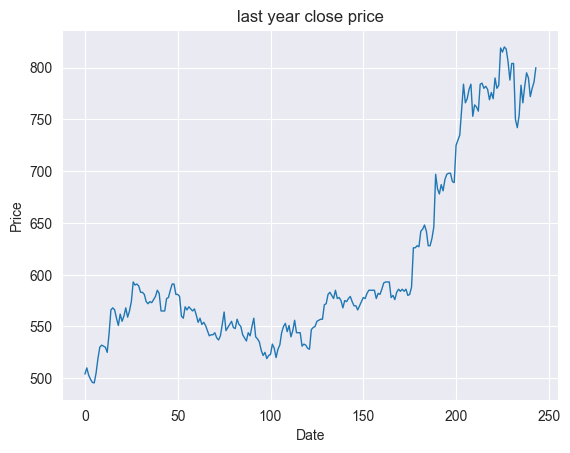

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
# plt.style.use("seaborn-darkgrid")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title('last year close price')
# plt.plot(test_10day['High']-test_10day['clo'],linewidth=1)
plt.plot(test_day['clo'],linewidth=1)

plt.show()

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
scaler_prices=scaler.fit_transform(test_day.values)
scaler_prices

array([[0.02619414],
       [0.04468413],
       [0.02311248],
       [0.01078582],
       [0.00154083],
       [0.        ],
       [0.02927581],
       [0.07241911],
       [0.10631741],
       [0.11248074],
       [0.10939908],
       [0.10631741],
       [0.09090909],
       [0.14637904],
       [0.21725732],
       [0.22342065],
       [0.21725732],
       [0.19260401],
       [0.17103236],
       [0.20493066],
       [0.18335901],
       [0.19876733],
       [0.22342065],
       [0.19568567],
       [0.21417565],
       [0.24191063],
       [0.30046225],
       [0.29121726],
       [0.29429892],
       [0.28813559],
       [0.26964561],
       [0.26964561],
       [0.26348228],
       [0.24191063],
       [0.2357473 ],
       [0.24191063],
       [0.23882897],
       [0.24807396],
       [0.25731895],
       [0.27580894],
       [0.26656394],
       [0.21417565],
       [0.21417565],
       [0.21417565],
       [0.25115562],
       [0.25423729],
       [0.27580894],
       [0.294

# Construct dataset

In [31]:
import numpy as  np
MOVING_WIN_SIZE=35

all_x,all_y=[],[]
for i in range(len(scaler_prices)-MOVING_WIN_SIZE):
    x=scaler_prices[i:i+MOVING_WIN_SIZE]
    y=scaler_prices[i+MOVING_WIN_SIZE]
    all_x.append(x)
    all_y.append(y)

all_x,all_y=np.array(all_x),np.array(all_y)

In [32]:
all_x.shape

(209, 35, 1)

In [33]:
all_y.shape

(209, 1)

# Datadets Split

In [1]:
DS_SPLIT=0.8

train_ds_size=round(all_x.shape[0]*DS_SPLIT)
train_x,train_y=all_x[:train_ds_size],all_y[:train_ds_size]
test_x,test_y=all_x[train_ds_size:],all_y[train_ds_size:]

NameError: name 'all_x' is not defined

In [35]:
train_x.shape

(167, 35, 1)

In [36]:
train_y.shape

(167, 1)

In [37]:
test_x.shape

(42, 35, 1)

In [38]:
test_y.shape

(42, 1)

# 建構模型

In [55]:
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.models import Sequential

model =Sequential()
model.add(LSTM(units=128,return_sequences=True,input_shape=(train_x.shape[1],1)))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.summary()

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 35, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        35,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,661 (404.93 KB)

 Trainable params: 103,661 (404.93 KB)

 Non-trainable params: 0 (0.00 B)

### Optimizer & Loss function

In [56]:
#Optimizer="adam"
#Loss function="mean_squared_error"
model.compile(optimizer="adam",loss="mean_squared_error")

### train model

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

callback=EarlyStopping( monitor="val_loss",patience=100,restore_best_weights=True)
model.fit(train_x,train_y,
          validation_split=0.2,
          callbacks=[callback],
          epochs=1000
          )

Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0213 - val_loss: 0.0086
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0048 - val_loss: 0.0591
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0037 - val_loss: 0.0442
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0017 - val_loss: 0.0248
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0021 - val_loss: 0.0320
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0020 - val_loss: 0.0431
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0019 - val_loss: 0.0323
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0016 - val_loss: 0.0224
Epoch 9/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0015 - val_loss: 0.0289
Epoch 10/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0015 - val_loss: 0.0290
Epoch 11/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0016 - val_loss: 0.0224
Epoch 12/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0

In [58]:
preds=model.predict(test_x)
preds

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


array([[0.741899  ],
       [0.7511394 ],
       [0.8332799 ],
       [0.9032914 ],
       [0.8305927 ],
       [0.8642583 ],
       [0.9020673 ],
       [0.91775   ],
       [0.81169236],
       [0.87815595],
       [0.86662877],
       [0.8537201 ],
       [0.9435577 ],
       [0.9271539 ],
       [0.9093139 ],
       [0.92431265],
       [0.916602  ],
       [0.8880124 ],
       [0.9209209 ],
       [0.8949972 ],
       [0.96367437],
       [0.91341573],
       [0.92970526],
       [1.0472343 ],
       [1.0059508 ],
       [1.0273547 ],
       [1.0210737 ],
       [0.98625875],
       [0.93917036],
       [1.008481  ],
       [0.99218833],
       [0.8061035 ],
       [0.8235145 ],
       [0.86360717],
       [0.9395751 ],
       [0.8551214 ],
       [0.91314   ],
       [0.94515204],
       [0.9199199 ],
       [0.86698014],
       [0.90969557],
       [0.9253095 ]], dtype=float32)

In [59]:
preds=scaler.inverse_transform(preds)
preds

array([[736.2463 ],
       [739.24475],
       [765.89935],
       [788.61804],
       [765.02734],
       [775.95184],
       [788.2208 ],
       [793.3099 ],
       [758.89417],
       [780.4616 ],
       [776.721  ],
       [772.53217],
       [801.68445],
       [796.36145],
       [790.5724 ],
       [795.43945],
       [792.9374 ],
       [783.66003],
       [794.33887],
       [785.9266 ],
       [808.21234],
       [791.90344],
       [797.18933],
       [835.3276 ],
       [821.931  ],
       [828.87665],
       [826.83844],
       [815.541  ],
       [800.2608 ],
       [822.75214],
       [817.4651 ],
       [757.0806 ],
       [762.73047],
       [775.74054],
       [800.3921 ],
       [772.98694],
       [791.8139 ],
       [802.20184],
       [794.014  ],
       [776.8351 ],
       [790.69617],
       [795.76294]], dtype=float32)

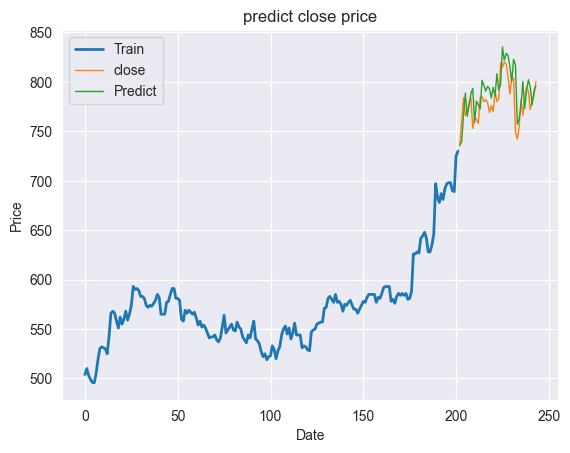

In [60]:
train_data=test_day[:train_ds_size+MOVING_WIN_SIZE]
test_data=test_day[train_ds_size+MOVING_WIN_SIZE:]
test_data=test_data.assign(Predict=preds)

plt.xlabel("Date")
plt.ylabel("Price")
plt.title('predict close price')
plt.plot(train_data['clo'],linewidth=2)
plt.plot(test_data['clo'],linewidth=1)
plt.plot(test_data['Predict'],linewidth=1)

plt.legend(["Train","close","Predict"])
plt.show()


In [61]:
test_data=test_data.assign(Shifted=test_data['clo'].shift(1))
test_data.iat[0,-1]=train_data.iat[-1,-1]
test_data

,clo,Predict,Shifted
202,735.0,736.246277,730.0
203,760.0,739.244751,735.0
204,784.0,765.899353,760.0
205,766.0,788.618042,784.0
206,770.0,765.027344,766.0
207,779.0,775.951843,770.0
208,784.0,788.220825,779.0
209,753.0,793.309875,784.0
210,764.0,758.894165,753.0
211,762.0,780.461609,764.0


In [62]:
from sklearn.metrics import mean_squared_error

predict_rmse=mean_squared_error(test_data['clo'],test_data['Predict'],squared=False)
predict_cvrmse=predict_rmse / test_data['clo'].mean()*100

shifted_rmse=mean_squared_error(test_data['clo'],test_data['Shifted'],squared=False)
shifted_cvrmse=shifted_rmse / test_data['clo'].mean()*100


print(f"predict\t=  {predict_cvrmse} % \nshift\t=  {shifted_cvrmse} %")

predict	=  2.5202916523323076 % 
shift	=  2.1276107527822123 %


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
